## A도시 범죄발생현황 분석

### 분석 목표 설정
- 범죄 발생 추이 (연도별)
- 범죄 유형별 분포 (절도, 폭력, 성범죄, 마약 등)
- 범죄 발생 시간대 분석 (심야/새벽 집중 여부)

### 분석 진행 
- 두 데이터를 시간대별로 일관된 형태로 정규화
- 연도별로 합쳐서 분석 가능한 구조로 변환
- 죄유형별 시간대별 경향 분석 및 시각화

In [4]:
### 데이터 로드
import pandas as pd

file_path = "A도시_범죄발생현황.xlsx"
excel_file = pd.ExcelFile(file_path)

sheet_names = excel_file.sheet_names
df_2019_2022 = excel_file.parse('2019-2022')
df_2023 = excel_file.parse('2023')
df_2019_2022.head(), df_2023.head()

(     연도   항목  심     야(0시-4시)  새     벽(4시-7시)  오     전(7시-12시)  \
 0  2019  강력범              20               7                7   
 1  2019  절도범             121              31              152   
 2  2019  폭력범             252              25              131   
 3  2019  지능범            1131              16              193   
 4  2019  풍속범               7               0                4   
 
    오     후(12시-18시)  초 저 녁(18시-20시)  밤(20시-24시)  
 0                13               4          17  
 1               299              95         151  
 2               175              78         215  
 3               272              60          71  
 4                 5               1           6  ,
      연도   항목  00:00~02:59  03:00~05:59  06:00~08:59  09:00~11:59  12:00~14:59  \
 0  2023  강력범           39            9            4            9            6   
 1  2023  절도범          236           67          100          152          197   
 2  2023  폭력범          308           48          

In [5]:
### 두개 시트 데이터를 정규화
df_2019_2022.columns = ['연도', '범죄유형', '심야(0~4)', '새벽(4~7)', '오전(7~12)', '오후(12~18)', '초저녁(18~20)', '밤(20~24)']
df19_22_melted = df_2019_2022.melt(id_vars=['연도', '범죄유형'], 
                                   var_name='시간대', value_name='발생건수')

# 2023 시트도 유사하게 변환
df_2023.columns = ['연도', '범죄유형', '00:00~02:59', '03:00~05:59', '06:00~08:59', '09:00~11:59',
                   '12:00~14:59', '15:00~17:59', '18:00~20:59', '21:00~23:59', '미상']
df23_melted = df_2023.melt(id_vars=['연도', '범죄유형'], 
                           var_name='시간대', value_name='발생건수')

# 두 데이터 프레임 병합 전, 시간대 형식 통일을 위해 2023 데이터를 그룹핑
시간대_매핑 = {
    '00:00~02:59': '심야(0~4)', '03:00~05:59': '심야(0~4)',
    '06:00~08:59': '새벽(4~7)', '09:00~11:59': '오전(7~12)',
    '12:00~14:59': '오후(12~18)', '15:00~17:59': '오후(12~18)',
    '18:00~20:59': '초저녁(18~20)', '21:00~23:59': '밤(20~24)'
}

# 미상은 분석에서 제외
df23_filtered = df23_melted[df23_melted['시간대'] != '미상'].copy()
df23_filtered['시간대'] = df23_filtered['시간대'].map(시간대_매핑)

# 시간대와 범죄유형 기준으로 합산
df23_grouped = df23_filtered.groupby(['연도', '범죄유형', '시간대'], as_index=False)['발생건수'].sum()

# 2019~2022 + 2023 합치기
df_all = pd.concat([df19_22_melted, df23_grouped], ignore_index=True)

# 결과 확인
df_all.head(10)

,연도,범죄유형,시간대,발생건수
0,2019,강력범,심야(0~4),20
1,2019,절도범,심야(0~4),121
2,2019,폭력범,심야(0~4),252
3,2019,지능범,심야(0~4),1131
4,2019,풍속범,심야(0~4),7
5,2019,기타형법범,심야(0~4),223
6,2019,특별법범,심야(0~4),616
7,2020,강력범,심야(0~4),37
8,2020,절도범,심야(0~4),193
9,2020,폭력범,심야(0~4),232


### 범죄유형별 시간대 발생 분포 (전체 합산 기준)

In [7]:
### 그래프 한글 표기 
import platform
from matplotlib import font_manager, rc

def set_font():
    if platform.system() == 'Darwin':     # IOS
        rc('font', family='AppleGothic')
    elif platform.system() == 'Windows':
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Linux':
        path = "/usr/share/fonts/truetype/freefont/malgun.ttf"
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~') 

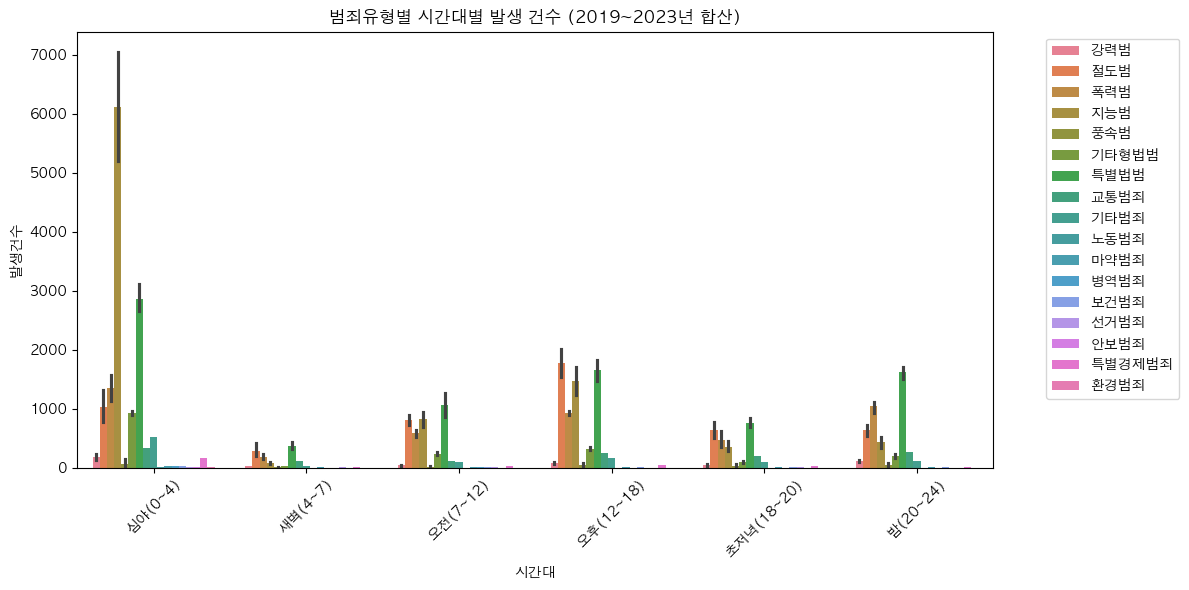

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

set_font()

# 전체 범죄유형별 시간대 분포 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_all, x='시간대', y='발생건수', hue='범죄유형', estimator='sum')
plt.title('범죄유형별 시간대별 발생 건수 (2019~2023년 합산)')
plt.ylabel('발생건수')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

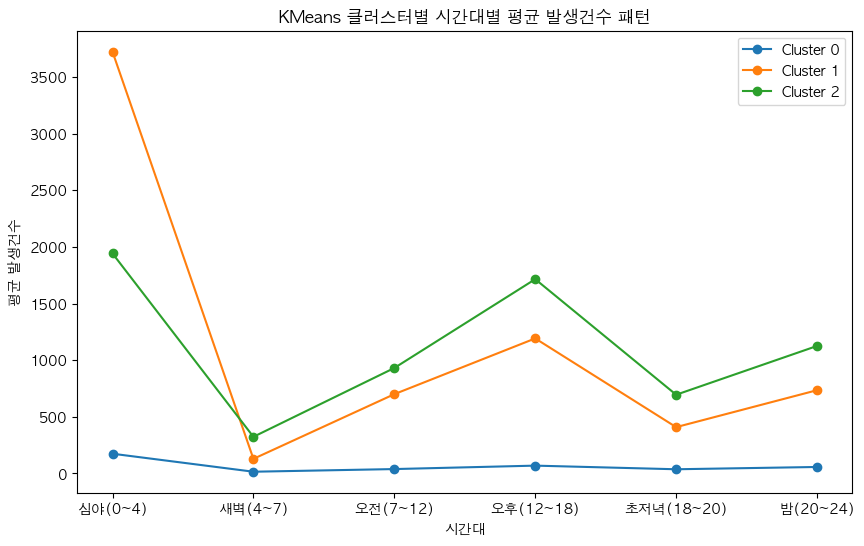

범죄유형
강력범       0
교통범죄      0
기타범죄      0
기타형법범     0
노동범죄      0
마약범죄      0
병역범죄      0
보건범죄      0
선거범죄      0
안보범죄      0
절도범       2
지능범       1
특별경제범죄    0
특별법범      2
폭력범       1
풍속범       0
환경범죄      0
Name: 클러스터, dtype: int32


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

set_font()


# 피벗 테이블 생성
time_columns = ['심야(0~4)', '새벽(4~7)', '오전(7~12)', '오후(12~18)', '초저녁(18~20)', '밤(20~24)']
pivot = df_all.pivot_table(index='범죄유형', columns='시간대', values='발생건수', aggfunc='sum', fill_value=0)
pivot = pivot[time_columns]

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivot)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
pivot['클러스터'] = kmeans.fit_predict(X_scaled)

# 결과 시각화
pivot_grouped = pivot.groupby('클러스터')[time_columns].mean()
plt.figure(figsize=(10,6))
for idx, row in pivot_grouped.iterrows():
    plt.plot(time_columns, row, marker='o', label=f'Cluster {idx}')
plt.legend()
plt.title('KMeans 클러스터별 시간대별 평균 발생건수 패턴')
plt.ylabel('평균 발생건수')
plt.xlabel('시간대')
plt.show()

# 각 범죄유형의 클러스터 확인
print(pivot['클러스터'])

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 더미 변수 변환
df_reg = pd.get_dummies(df_all, columns=['연도', '범죄유형', '시간대'])
X = df_reg.drop('발생건수', axis=1)
y = df_reg['발생건수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
reg = LinearRegression()
reg.fit(X_train, y_train)

# 평가
y_pred = reg.predict(X_test)
## 해석 : 예측값과 실제값의 평균 제곱 오차 - 값이 적을수록 모델의 예측이 실제값과 가깝다는 뜻 
## 예를 들면 MES 가 10이라면 예측값이 실제값과 평균적으로 3.16 차이가 난다는 뜻 
print("MSE:", mean_squared_error(y_test, y_pred))

## 해석 : 예측값과 실제값의 상관관계 - 값이 1에 가까울수록 예측값과 실제값이 같은 방향으로 변동한다는 뜻 
## 예를 들면 R^2 가 0.9 라면 예측값이 실제값의 90%를 설명한다는 뜻 
print("R^2:", r2_score(y_test, y_pred))

# 회귀계수
coef = pd.Series(reg.coef_, index=X.columns)
print(coef.sort_values(ascending=False))

# 예측 예시
# 예측용 sample 생성 (X.columns와 동일한 구조)
sample = pd.DataFrame(0, index=[0], columns=X.columns)

# 존재하는 컬럼만 1로 설정 (없는 컬럼은 무시)
if '연도_2023' in sample.columns:
    sample.at[0, '연도_2023'] = 1
if '범죄유형_강력범죄' in sample.columns:
    sample.at[0, '범죄유형_강력범죄'] = 1
if '시간대_심야(0~4)' in sample.columns:
    sample.at[0, '시간대_심야(0~4)'] = 1

# 예측
predicted = reg.predict(sample)
print("예상 발생건수:", predicted[0])

MSE: 35929.837215134714
R^2: 0.47940119408732196
범죄유형_특별법범         283.936129
범죄유형_지능범          205.676512
시간대_심야(0~4)       183.048002
범죄유형_교통범죄         124.923246
범죄유형_절도범           94.672178
범죄유형_기타범죄          88.173246
범죄유형_폭력범           83.745249
연도_2023            30.893640
시간대_오후(12~18)      26.100443
연도_2021            12.683468
범죄유형_기타형법범          7.730700
연도_2022            -2.083496
연도_2019           -14.825595
시간대_밤(20~24)      -23.012695
연도_2020           -26.668017
시간대_오전(7~12)      -30.648272
범죄유형_환경범죄         -50.829090
범죄유형_강력범          -53.662015
시간대_초저녁(18~20)    -56.293540
범죄유형_특별경제범죄       -58.518740
범죄유형_풍속범          -61.370973
범죄유형_마약범죄         -94.449535
시간대_새벽(4~7)       -99.193938
범죄유형_노동범죄        -102.949535
범죄유형_안보범죄        -102.949535
범죄유형_병역범죄        -115.754989
범죄유형_선거범죄        -121.954989
범죄유형_보건범죄        -126.417860
dtype: float64
예상 발생건수: 286.16420369756304


R²가 0.479로 중간정도 되므로, 예측값은 해당 조건에서의 평균적인 발생건수로만 해석  
2024년, 강력범죄, 심야(0~4) 시간대에 약 286건의 범죄가 발생할 것으로 예측된다는 뜻입니다.

### 결론 도출 예시
- 지능범죄는 일과시간(오전~오후)에 집중되는 경향
- 폭력범죄는 심야~밤 시간대에 걸쳐 상대적으로 고르게 분포
- 강력범죄는 심야 및 밤 시간대에 집중
- 전체 범죄 중 오후~밤 시간대 비중이 가장 큼 → 대응 인력 배치 강화 필요
- 연도별로는 2023년 강력범죄와 폭력범 증가 경향 존재 가능